<div align="center">
  <b> <font size="6">Multi-Class Classification using Logistic Regression</font> </b>
</div>

We will predict hand-written digits. The dataset is available here https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [1]:
# Import necessary package
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Step 1: Load the dataset

In [2]:
# Load the dataset into pandas dataframe
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# Dataset folder contains the following folders
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]
# 64 values are used to represent an image (8x8 = 64 values as 1 D array) which is availale in data folder

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

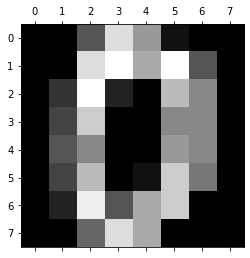

In [5]:
# Display the image of respective input from images folder
plt.gray()  
plt.matshow(digits.images[0]) 
plt.show()

<Figure size 432x288 with 0 Axes>

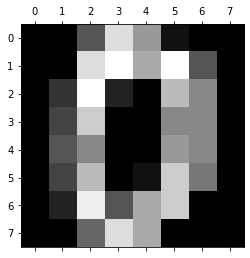

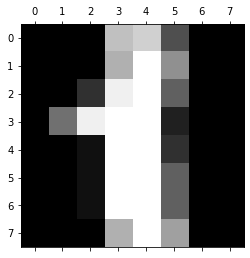

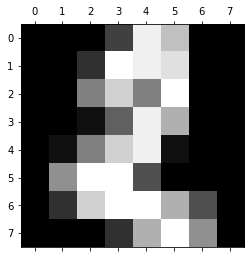

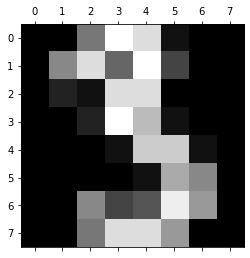

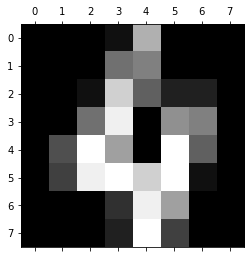

In [6]:
# Let us display 5 images
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 
    plt.show()

In [7]:
# Target label for each image
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Step 2: Apply EDA

Any EDA techniques

### Step 3. Pre-process and extract the features

It is already well loaded

### Step 4. Split the data for training and testing

In [8]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2) 

### Step 5. Training the model

##### Fitting the model

In [9]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

C:\Users\Rathinaraja Jeyaraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_train_pred = logistic_model.predict(x_train) 
y_train_pred

array([5, 3, 3, ..., 9, 4, 8])

In [11]:
train_predicted_prob = logistic_model.predict_proba(x_train)
train_predicted_prob
# each row contains probability for each digit

array([[1.65343039e-06, 1.88862528e-13, 9.47297093e-10, ...,
        4.21817324e-12, 1.78846051e-06, 6.06485540e-10],
       [8.65279130e-22, 2.78292795e-22, 1.56931565e-15, ...,
        4.49431750e-19, 2.03211969e-12, 7.58522283e-11],
       [3.02423565e-13, 9.05636296e-14, 7.17503083e-07, ...,
        1.43685765e-11, 3.02520639e-10, 8.97661248e-08],
       ...,
       [3.30098358e-06, 4.36389257e-13, 2.40686173e-10, ...,
        3.88021625e-08, 6.15172902e-08, 9.98643455e-01],
       [3.30213100e-12, 1.92304116e-11, 1.00558877e-20, ...,
        3.10864231e-11, 1.50858926e-14, 1.23415495e-26],
       [8.98580572e-04, 4.23912326e-03, 2.21387617e-02, ...,
        3.55708497e-05, 9.72201161e-01, 3.07963485e-06]])

##### Performance score for logistic regression

In [12]:
out = logistic_model.score(x_train,y_train)
Logistic_Train_RS = np.round(out,2)*100
print("Performance score for training set :",Logistic_Train_RS,"%") 

Performance score for training set : 100.0 %


##### Confusion matrix

R2 score says the performance of logistic regression over simple probability that does not feature Age. <br>
We are interested to know how many has been correctly and wrongly classified.

Text(64.5, 0.5, 'Truth')

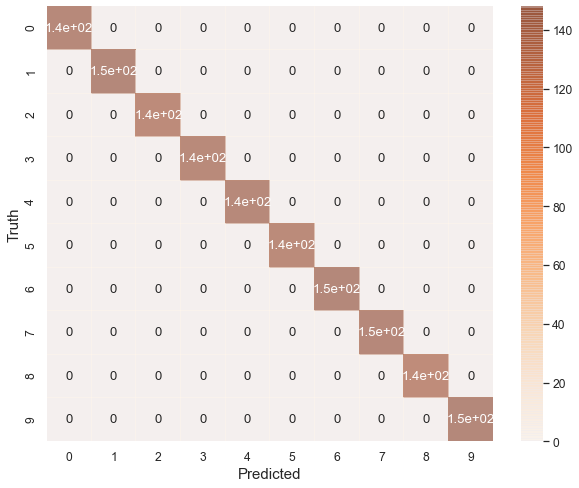

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_train_pred)

plt.figure(figsize = (10,8))
sns.set(font_scale=1.1)

axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15) 

sns.heatmap(cm, annot=True,cmap=plt.cm.Oranges, alpha=0.5)

plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Precison, Recall, F1, Accuracy

In [14]:
# Total report
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       148
           2       1.00      1.00      1.00       139
           3       1.00      1.00      1.00       143
           4       1.00      1.00      1.00       145
           5       1.00      1.00      1.00       141
           6       1.00      1.00      1.00       147
           7       1.00      1.00      1.00       146
           8       1.00      1.00      1.00       137
           9       1.00      1.00      1.00       147

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



In [15]:
# Accuracy score
temp = metrics.accuracy_score(y_train,y_train_pred)
Logistic_Train_Accuracy = np.round(temp,2)*100
print("Accuracy score : ",Logistic_Train_Accuracy,"%")

Accuracy score :  100.0 %


In [16]:
# Precision score
temp = metrics.precision_score(y_train,y_train_pred,average="macro")
Logistic_Train_Precision = np.round(temp,2)*100
print("Precision score : ",Logistic_Train_Precision,"%")

Precision score :  100.0 %


In [17]:
# Recall score
temp = metrics.recall_score(y_train,y_train_pred,average="macro")
Logistic_Train_Recall = np.round(temp,2)*100
print("Recall score : ",Logistic_Train_Recall,"%")

Recall score :  100.0 %


In [18]:
# F1 score
temp = metrics.f1_score(y_train,y_train_pred,average="macro")
Logistic_Train_F1 = np.round(temp,2)*100
print("F1 score : ",Logistic_Train_F1,"%")

F1 score :  100.0 %


In [19]:
# Cohen Kappa score
temp = metrics.cohen_kappa_score(y_train,y_train_pred)
Logistic_Train_CK = np.round(temp,2)*100
print("Cohen Kappa score : ",Logistic_Train_CK,"%")

Cohen Kappa score :  100.0 %


##### ROC 

It should be plotted

### Step 6. Testing the model

In [20]:
# Predicting values for test input set
y_test_pred = logistic_model.predict(x_test)
y_test_pred

array([2, 7, 4, 7, 1, 9, 5, 1, 6, 4, 4, 0, 5, 4, 3, 4, 4, 6, 1, 4, 6, 2,
       3, 4, 9, 2, 3, 0, 5, 6, 2, 8, 7, 4, 2, 3, 2, 4, 0, 5, 9, 9, 7, 1,
       4, 1, 7, 0, 3, 5, 6, 3, 6, 1, 9, 7, 7, 7, 0, 2, 2, 4, 6, 3, 3, 3,
       7, 7, 3, 3, 9, 9, 1, 0, 8, 0, 3, 6, 8, 3, 9, 6, 0, 4, 8, 9, 5, 7,
       3, 7, 1, 8, 3, 3, 6, 6, 8, 2, 6, 6, 9, 6, 4, 9, 5, 8, 3, 8, 4, 5,
       1, 7, 5, 6, 0, 8, 8, 7, 2, 0, 2, 5, 2, 3, 5, 6, 6, 7, 0, 2, 8, 9,
       9, 2, 6, 9, 3, 2, 9, 0, 9, 4, 6, 8, 2, 3, 9, 4, 4, 0, 1, 5, 1, 0,
       7, 2, 7, 2, 8, 2, 9, 8, 9, 0, 8, 9, 1, 9, 9, 0, 6, 6, 3, 2, 8, 1,
       7, 2, 4, 9, 4, 9, 0, 3, 0, 1, 4, 4, 6, 5, 2, 3, 5, 3, 6, 0, 8, 2,
       5, 0, 3, 5, 5, 3, 1, 9, 4, 1, 1, 1, 8, 3, 5, 1, 9, 1, 2, 0, 2, 2,
       4, 9, 6, 8, 8, 5, 8, 1, 9, 8, 8, 8, 5, 8, 5, 8, 6, 6, 2, 1, 7, 8,
       4, 1, 3, 1, 3, 3, 5, 2, 4, 9, 8, 8, 4, 6, 6, 7, 8, 7, 7, 7, 1, 1,
       3, 5, 0, 0, 9, 7, 1, 0, 8, 4, 7, 8, 2, 2, 7, 1, 6, 7, 8, 9, 6, 3,
       3, 9, 0, 9, 5, 3, 8, 2, 0, 6, 2, 6, 1, 9, 0,

In [21]:
test_predicted_prob = logistic_model.predict_proba(x_test)
test_predicted_prob

array([[2.61582464e-17, 6.36102953e-14, 9.99981368e-01, ...,
        6.32816723e-15, 8.43415735e-08, 2.54647447e-12],
       [1.12195460e-12, 3.38597251e-09, 1.84528603e-11, ...,
        9.99999974e-01, 8.18932749e-11, 5.37784237e-13],
       [4.70747557e-09, 1.17521732e-02, 3.25445044e-15, ...,
        2.42344059e-07, 2.83830434e-05, 9.41348585e-14],
       ...,
       [2.41062240e-10, 9.99968965e-01, 4.12617874e-08, ...,
        1.63297882e-09, 2.99847610e-06, 2.69792678e-06],
       [9.99917021e-01, 3.42658903e-17, 9.61063241e-09, ...,
        3.61169708e-12, 8.27709068e-05, 9.43399890e-08],
       [1.50594596e-11, 6.48978633e-10, 1.04976291e-07, ...,
        3.57640245e-10, 1.07855157e-07, 1.05188150e-08]])

##### Performance score for logistic regression

In [22]:
out = logistic_model.score(x_test,y_test)
Logistic_Test_RS = np.round(out,2)*100
print("Performance score for training set :",Logistic_Test_RS,"%") 

Performance score for training set : 96.0 %


##### Confusion matrix

R2 score says the performance of logistic regression over simple probability that does not feature Age. <br>
We are interested to know how many has been correctly and wrongly classified.

Text(19.5, 0.5, 'Truth')

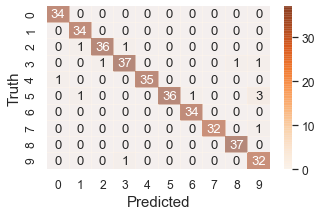

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize = (5,3))
sns.set(font_scale=1.1)

axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15) 

sns.heatmap(cm, annot=True,cmap=plt.cm.Oranges, alpha=0.5)

plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Precison, Recall, F1, Accuracy

In [24]:
# Total report
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.94      1.00      0.97        34
           2       0.97      0.95      0.96        38
           3       0.95      0.93      0.94        40
           4       1.00      0.97      0.99        36
           5       1.00      0.88      0.94        41
           6       0.97      1.00      0.99        34
           7       1.00      0.97      0.98        33
           8       0.97      1.00      0.99        37
           9       0.86      0.97      0.91        33

    accuracy                           0.96       360
   macro avg       0.96      0.97      0.96       360
weighted avg       0.97      0.96      0.96       360



In [25]:
# Accuracy score
temp = metrics.accuracy_score(y_test,y_test_pred)
Logistic_Test_Accuracy = np.round(temp,2)*100
print("Accuracy score : ",Logistic_Test_Accuracy,"%")

Accuracy score :  96.0 %


In [26]:
# Precision score
temp = metrics.precision_score(y_test,y_test_pred,average="macro")
Logistic_Test_Precision = np.round(temp,2)*100
print("Precision score : ",Logistic_Test_Precision,"%")

Precision score :  96.0 %


In [27]:
# Recall score
temp = metrics.recall_score(y_test,y_test_pred,average="macro")
Logistic_Test_Recall = np.round(temp,2)*100
print("Recall score : ",Logistic_Test_Recall,"%")

Recall score :  97.0 %


In [28]:
# F1 score
temp = metrics.f1_score(y_test,y_test_pred,average="macro")
Logistic_Test_F1 = np.round(temp,2)*100
print("F1 score : ",Logistic_Test_F1,"%")

F1 score :  96.0 %


In [29]:
# Cohen Kappa score
temp = metrics.cohen_kappa_score(y_test,y_test_pred)
Logistic_Test_CK = np.round(temp,2)*100
print("Cohen Kappa score : ",Logistic_Test_CK,"%")

Cohen Kappa score :  96.0 %


##### ROC 

It should be plotted

### Step 7. Deploying model for prediction

##### Prediction by passing individual input

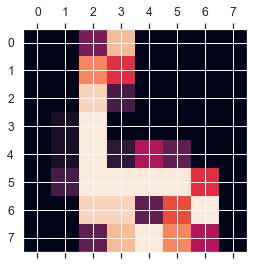

In [30]:
plt.matshow(digits.images[67])

In [31]:
digits.target[67]

6

In [32]:
logistic_model.predict([digits.data[67]])
# giving the image index to the model, which will take the image as necessary input

array([6])

In [33]:
logistic_model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

### Step 8. Summary

In [34]:
print("             Logistic Regression      ")
print("====================================================")
print("\t\tTraining phase       Testing phase ")
print("====================================================")
print("RS\t\t   ",Logistic_Train_RS,"%\t\t", Logistic_Test_RS,"%") 
print("Accuracy\t   ",Logistic_Train_Accuracy,"%\t\t", Logistic_Test_Accuracy,"%") 
print("Precision\t   ",Logistic_Train_Precision,"%\t\t", Logistic_Test_Precision,"%") 
print("Recall\t\t   ",Logistic_Train_Recall,"%\t\t", Logistic_Test_Recall,"%") 
print("F1\t\t   ",Logistic_Train_F1,"%\t\t", Logistic_Test_F1,"%") 
print("CK\t\t   ",Logistic_Train_CK,"%\t\t", Logistic_Test_CK,"%") 
#print("AUC\t\t   ",Logistic_Train_AUC,"%\t\t", Logistic_Test_AUC,"%") 
print("====================================================")

             Logistic Regression      
		Training phase       Testing phase 
RS		    100.0 %		 96.0 %
Accuracy	    100.0 %		 96.0 %
Precision	    100.0 %		 96.0 %
Recall		    100.0 %		 97.0 %
F1		    100.0 %		 96.0 %
CK		    100.0 %		 96.0 %
